Data Augmentation

In [1]:
import imgaug as ia
from imgaug import augmenters as iaa
import numpy as np
import imageio
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
ia.seed(1)

img = imageio.imread("ISIC_0024307.jpg") #reading test image
images = np.array(
    [img for _ in range(3)], dtype=np.uint8)  # create 1 augmented images using following methods

seq = iaa.Sequential(             # applying combination of augmentations - can remove/add whatever
    [
        iaa.Fliplr(0.5),  
        iaa.Crop(percent=(0, 0.1)),            
        iaa.Sometimes(0.5, iaa.GaussianBlur(sigma=(0, 0.5))),        
        iaa.ContrastNormalization((0.75, 1.5)),         
        iaa.AdditiveGaussianNoise(
            loc=0, scale=(0.0, 0.05 * 255), per_channel=0.5),    
        iaa.Multiply((0.8, 1.2), per_channel=0.2),
        iaa.Affine(
            scale={
                "x": (0.8, 1.2),
                "y": (0.8, 1.2)
            },
            translate_percent={
                "x": (-0.2, 0.2),
                "y": (-0.2, 0.2)
            },
            rotate=(-25, 25),
            shear=(-8, 8))
    ],
    random_order=True)  # apply augmentations in random order

images_aug = seq.augment_images(images)
for i in range(3):
    imageio.imwrite(str(i)+'new.jpg', images_aug[i])  #write all changed images

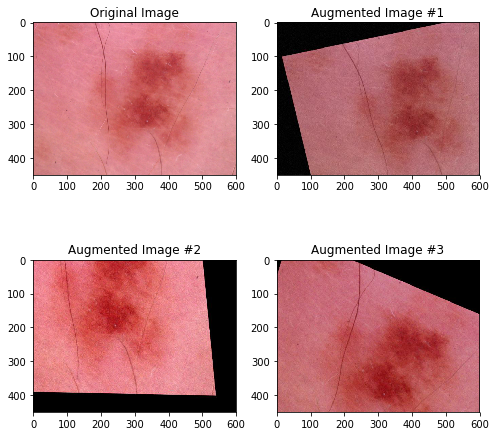

In [21]:
img1 = mpimg.imread('ISIC_0024307.jpg')
img2 = mpimg.imread('0new.jpg')
img3 = mpimg.imread('1new.jpg')
img4 = mpimg.imread('2new.jpg')

plt.figure(figsize=(8, 8))
plt.subplot(221)
plt.title('Original Image')
plt.imshow(img1)
plt.subplot(222)
plt.title('Augmented Image #1')
plt.imshow(img2)
plt.subplot(223)
plt.title('Augmented Image #2')
plt.imshow(img3)
plt.subplot(224)
plt.title('Augmented Image #3')
plt.imshow(img4)
plt.show()

In [4]:
# NEED TO PROGRAM THIS for ONLINE AUGMENTATION
#for batch_idx in range(100):
    # 'images' should be either a 4D numpy array of shape (N, height, width, channels)
    # or a list of 3D numpy arrays, each having shape (height, width, channels).
    # Grayscale images must have shape (height, width, 1) each.
    # All images must have numpy's dtype uint8. Values are expected to be in
    # range 0-255.
#    images = load_batch(batch_idx)  # you have to implement this function
#    images_aug = seq.augment_images(images)  # done by the library
#    train_on_images(images_aug)  # you have to implement this function